<h1><center>Medical Cost Personal Datasets</center></h1>

<center>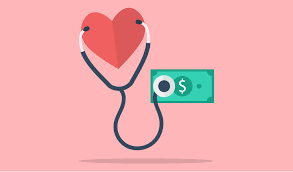</center>

**Context** 

Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

**Content** 

*Columns* 

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance

**Acknowledgements**

The dataset is available on GitHub here.

**Inspiration**

Can you accurately predict insurance costs?

## Contents

1. [Import data and python packages](#t1.)

2. [Data visualization](#t2.)

3. [Regression](#t3.)


<a id="t1."></a>
# 1. Import data and python packages

In [ ]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

In [ ]:
plt.style.use('ggplot')
warnings.simplefilter('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import CooksDistance

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, XGBRFRegressor

In [ ]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
df.head()

In [ ]:
df.sex = df.sex.replace(['male','female'],['Male','Female'])
df.smoker = df.smoker.replace(['yes','no'],['Yes','No'])

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
pd.DataFrame(df.groupby("region")["age","charges","bmi","children"].mean().sort_values("age",ascending=False)[:10]).style.background_gradient("Reds")

In [ ]:
pd.DataFrame(df.groupby("sex")["age","charges","bmi","children"].mean().sort_values("age",ascending=False)[:10]).style.background_gradient("Reds")

In [ ]:
pd.DataFrame(df.groupby("smoker")["age","charges","bmi","children"].mean().sort_values("age",ascending=False)[:10]).style.background_gradient("Reds")

In [ ]:
pd.DataFrame(df.groupby("children")["age","charges","bmi"].mean().sort_values("age",ascending=False)[:10]).style.background_gradient("Reds")

<a id="t2."></a>
# 2. Data visualization

In [ ]:
missingno.matrix(df);

In [ ]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
label  = df.sex.value_counts().index
size   = df.sex.value_counts().values
plt.pie(x=size,autopct='%1.1f%%',shadow=False, textprops={'color':"k","fontsize":14}, startangle=90,explode=(0,.1),
       colors=['teal','pink'])
plt.legend(label,bbox_to_anchor=(0.4, 0, .85, 1))
plt.subplot(2,2,2)
label  = df.smoker.value_counts().index
size   = df.smoker.value_counts().values
plt.pie(x=size,autopct='%1.1f%%',shadow=False, textprops={'color':"w","fontsize":14}, startangle=90,explode=(0,.1),
       colors=['green','orange'])
plt.legend(label,bbox_to_anchor=(0.8, -0.04, 0.4, 1))
plt.subplot(2,2,(3,4))
sns.countplot(data = df, x = 'sex', hue = 'smoker')
plt.xlabel('Sex')
plt.ylabel('')
plt.show()

In [ ]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
sns.boxplot(data = df, x = 'sex', y = 'age')
plt.subplot(2,2,2)
sns.boxplot(data = df, x = 'sex', y = 'charges')
plt.subplot(2,2,(3,4))
sns.scatterplot(data = df, x = 'age', y = 'charges', hue = 'sex', edgecolor = 'k')
plt.legend(loc='upper left')
plt.show()

In [ ]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
sns.violinplot(data = df, x = 'sex', y = 'bmi')
plt.subplot(2,2,2)
sns.violinplot(data = df, x = 'smoker', y = 'bmi')
plt.subplot(2,2,3)
sns.scatterplot(data = df, x = 'bmi', y = 'charges', hue = 'sex', edgecolor = 'k')
plt.legend(loc='upper left')
plt.subplot(2,2,4)
sns.scatterplot(data = df, x = 'bmi', y = 'age', hue = 'sex', edgecolor = 'k')
plt.show()

In [ ]:
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
sns.distplot(df.age, color='C0')
plt.subplot(2,2,2)
sns.distplot(df.charges, color='C1')
plt.subplot(2,2,3)
sns.distplot(df.bmi, color='C2')
plt.subplot(2,2,4)
sns.distplot(df.children, color='C4')
plt.show()

In [ ]:
plt.figure(figsize=(13,5))
df.groupby(['sex','smoker'])['charges'].mean().plot(kind="barh")
plt.xlabel('Average of Charges')
plt.show()

In [ ]:
plt.figure(figsize=(13,7))
df.groupby(['sex','smoker'])['region'].value_counts().plot(kind="barh")
plt.xlabel('Average of Age')
plt.show()

In [ ]:
X = df.drop(['charges','region'],axis=1)
region = pd.get_dummies(df.region)
X.sex = X.sex.replace(['Female','Male'],[0,1])
X.smoker = X.smoker.replace(['No','Yes'],[0,1])
X  = pd.concat([X,region], axis=1)
scale = StandardScaler()
scale.fit(X)
X = scale.transform(X)
y = df.charges

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [ ]:
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show();

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
print("Score Test:",model.score(X_test,y_test))
pred_br = model.predict(X_test)
print("MAE:",mean_absolute_error(y_test,pred_br))
print("MSE:",mean_squared_error(y_test,pred_br))

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)        
visualizer.show(); 

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [ ]:
model = Lasso()
model.fit(X_train,y_train)
print("Score Test:",model.score(X_test,y_test))
pred_br = model.predict(X_test)
print("MAE:",mean_absolute_error(y_test,pred_br))
print("MSE:",mean_squared_error(y_test,pred_br))

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)        
visualizer.show(); 

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [ ]:
model = Ridge()
model.fit(X_train,y_train)
print("Score Test:",model.score(X_test,y_test))
pred_br = model.predict(X_test)
print("MAE:",mean_absolute_error(y_test,pred_br))
print("MSE:",mean_squared_error(y_test,pred_br))

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)        
visualizer.show(); 

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [ ]:
model = MLPRegressor()
model.hidden_layer_sizes = (20,40,20)
model.activation = 'relu'
model.solver = 'adam'
model.max_iter = 500
model.alpha = 0.01

model.fit(X_train,y_train)
print("Score Test:",model.score(X_test,y_test))
pred_br = model.predict(X_test)
print("MAE:",mean_absolute_error(y_test,pred_br))
print("MSE:",mean_squared_error(y_test,pred_br))

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)        
visualizer.show(); 

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [ ]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
print("Score Test:",model.score(X_test,y_test))
pred_br = model.predict(X_test)
print("MAE:",mean_absolute_error(y_test,pred_br))
print("MSE:",mean_squared_error(y_test,pred_br))

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)        
visualizer.show(); 

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [ ]:
model = XGBRegressor()
model.fit(X_train,y_train)
print("Score Test:",model.score(X_test,y_test))
pred_br = model.predict(X_test)
print("MAE:",mean_absolute_error(y_test,pred_br))
print("MSE:",mean_squared_error(y_test,pred_br))

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)        
visualizer.show(); 

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

In [ ]:
model = XGBRFRegressor()
model.fit(X_train,y_train)
print("Score Test:",model.score(X_test,y_test))
pred_br = model.predict(X_test)
print("MAE:",mean_absolute_error(y_test,pred_br))
print("MSE:",mean_squared_error(y_test,pred_br))

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)        
visualizer.show(); 

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();